## Telecome Churn Case Study - Debasish Mondal

## Overview 
### Customers in the telecommunications industry tend to switch operators if they are not provided with appealing schemes and offers. It is very important for any telecom operator to prevent present customers from switching to other operators. Our task in this case study would be to build a machine learning model that can predict if a customer will churn or not in a particular month based on past data.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

### Step 1: Read and Understand the Datasets

In [2]:
# Read the given train data
train = pd.read_csv('train.csv')
train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [3]:
# Read the given test data
test = pd.read_csv('test.csv')
test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [4]:
# Shape of the train data
train.shape

(69999, 172)

In [5]:
# Shape of the test data
test.shape

(30000, 171)

In [6]:
# Describe the train data
train.describe(include = 'all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,69999,69600,69266,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,283.134365,278.185912,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,NaN,NaN,NaN,334.213918,344.366927,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,-2258.709000,-1289.715000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,93.581000,86.714000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,197.484000,191.588000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,370.791000,365.369500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000


In [7]:
# Describe the test data
test.describe(include = 'all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.0,29684.0,29684.0,29684.0,30000,29798,29633,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,7585.000000,7706.000000,7922.000000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,30000,29798,29633,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,84998.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,282.644348,279.355021,...,0.073467,0.077967,0.082200,0.909954,0.906956,0.891946,1218.023200,68.314097,68.946576,59.891621
std,8660.398374,0.0,0.0,0.0,0.0,NaN,NaN,NaN,314.560212,323.205370,...,0.557327,0.613596,0.611546,0.286267,0.290513,0.310468,960.109844,263.460641,278.749349,246.098292
min,69999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,-185.043000,-2014.045000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000
25%,77498.750000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,92.907500,87.504750,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,466.000000,0.000000,0.000000,0.000000
50%,84998.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,198.227500,191.775000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,853.000000,0.000000,0.000000,0.000000
75%,92498.250000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,371.969250,365.250750,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1795.000000,0.000000,0.000000,0.000000


In [8]:
# Information of the train data
train.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [9]:
# Information of the test data
test.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

### Step 2: Data Preparation

#### Step 2.1 Missing Value Treatment

In [10]:
# Identify columns with null-values
for val in train.columns: 
    if(round((train[val].isnull().sum()/len(train[val]))*100, 2) != 0):
        print(val,':', round((train[val].isnull().sum()/len(train.index))*100, 2))

loc_og_t2o_mou : 1.0
std_og_t2o_mou : 1.0
loc_ic_t2o_mou : 1.0
last_date_of_month_7 : 0.57
last_date_of_month_8 : 1.05
onnet_mou_6 : 3.95
onnet_mou_7 : 3.84
onnet_mou_8 : 5.29
offnet_mou_6 : 3.95
offnet_mou_7 : 3.84
offnet_mou_8 : 5.29
roam_ic_mou_6 : 3.95
roam_ic_mou_7 : 3.84
roam_ic_mou_8 : 5.29
roam_og_mou_6 : 3.95
roam_og_mou_7 : 3.84
roam_og_mou_8 : 5.29
loc_og_t2t_mou_6 : 3.95
loc_og_t2t_mou_7 : 3.84
loc_og_t2t_mou_8 : 5.29
loc_og_t2m_mou_6 : 3.95
loc_og_t2m_mou_7 : 3.84
loc_og_t2m_mou_8 : 5.29
loc_og_t2f_mou_6 : 3.95
loc_og_t2f_mou_7 : 3.84
loc_og_t2f_mou_8 : 5.29
loc_og_t2c_mou_6 : 3.95
loc_og_t2c_mou_7 : 3.84
loc_og_t2c_mou_8 : 5.29
loc_og_mou_6 : 3.95
loc_og_mou_7 : 3.84
loc_og_mou_8 : 5.29
std_og_t2t_mou_6 : 3.95
std_og_t2t_mou_7 : 3.84
std_og_t2t_mou_8 : 5.29
std_og_t2m_mou_6 : 3.95
std_og_t2m_mou_7 : 3.84
std_og_t2m_mou_8 : 5.29
std_og_t2f_mou_6 : 3.95
std_og_t2f_mou_7 : 3.84
std_og_t2f_mou_8 : 5.29
std_og_t2c_mou_6 : 3.95
std_og_t2c_mou_7 : 3.84
std_og_t2c_mou_8 : 5.29
st

#### Missing values in the some recharge related columns have minumum value one and mssing values in these columns indicates no recharge. So, we replace those missing values with zero.

In [11]:
# List of recharge columns with minimum value 1
recharge_col = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 
                'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

In [12]:
# Checking the above columns 
train[recharge_col].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [13]:
# Impute missing values in the above recharge columns with 0
for val in recharge_col:
    train[val] = train[val].fillna(0)
    test[val] = test[val].fillna(0)

In [14]:
# Imputation checking
train[recharge_col].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.619309,0.683981,0.697867,31.748339,32.260075,32.986614,48.395787,51.415168,51.782975
std,1.762010,1.943193,1.973434,77.519536,78.069163,78.808337,126.923180,133.246541,131.291162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,8.000000,14.000000,17.000000,8.000000,17.000000,23.000000
max,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [15]:
# Imputation checking
test[recharge_col].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.620700,0.676833,0.700033,31.894033,32.747533,33.407933,48.561194,51.342741,52.596458
std,1.757138,1.879782,1.939874,76.614487,78.976636,79.023333,129.640618,131.180208,130.929389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,14.000000,17.000000,17.000000,14.000000,17.000000,23.000000
max,55.000000,44.000000,57.000000,1555.000000,1555.000000,1555.000000,7546.000000,3765.000000,2520.000000


#### Missing values in the following columns indicate another category of recharge, which we identify as -1.

In [16]:
# List of columns with hidden categories
useage_col = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

In [17]:
# Impute missing values with -1
for val in useage_col:
    train[val] = train[val].fillna(-1)
    test[val] = test[val].fillna(-1)

In [18]:
# Aggregate the categorical variables
for val in useage_col:
    print(train.groupby(val).churn_probability.mean())

night_pck_user_6
-1.0    0.107208
 0.0    0.085027
 1.0    0.123874
Name: churn_probability, dtype: float64
night_pck_user_7
-1.0    0.114340
 0.0    0.065558
 1.0    0.065116
Name: churn_probability, dtype: float64
night_pck_user_8
-1.0    0.126246
 0.0    0.033722
 1.0    0.031008
Name: churn_probability, dtype: float64
fb_user_6
-1.0    0.107208
 0.0    0.109524
 1.0    0.083861
Name: churn_probability, dtype: float64
fb_user_7
-1.0    0.114340
 0.0    0.086015
 1.0    0.063512
Name: churn_probability, dtype: float64
fb_user_8
-1.0    0.126246
 0.0    0.066337
 1.0    0.029640
Name: churn_probability, dtype: float64


In [19]:
# Replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6': {-1: 0.107208, 0: 0.085027, 1: 0.123874},
           'night_pck_user_7': {-1: 0.114340, 0: 0.065558, 1: 0.065116},
           'night_pck_user_8': {-1: 0.126246, 0: 0.033722, 1: 0.031008},
           'fb_user_6': {-1: 0.107208, 0: 0.109524, 1: 0.083861},
           'fb_user_7': {-1: 0.114340, 0: 0.086015, 1: 0.063512},
           'fb_user_8': {-1: 0.126246, 0: 0.066337, 1: 0.029640}}
train.replace(mapping, inplace = True)
test.replace(mapping, inplace = True)

#### We remove all those columns that have more than 10% of their values missing.

In [20]:
# List of columns that contains more than 10% null values
null_10_col = []
for val in train.columns: 
    if(round((train[val].isnull().sum()/len(train[val]))*100, 2) >= 10):
        null_10_col.append(val)
        
print(null_10_col)
len(null_10_col)

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']


15

In [21]:
# Drop columns with more than 10% null values
train = train.drop(null_10_col, axis = 1)
test = test.drop(null_10_col, axis = 1)

#### Drop Irrelevant Columns

In [22]:
# Drop the 'id column'
train = train.drop(['id'], axis = 1)
test = test.drop(['id'], axis = 1)

In [23]:
# Shape of the remaining dataset: train data
train.shape

(69999, 156)

In [24]:
# Shape of the remaining dataset: test data
test.shape

(30000, 155)

#### Remove Single-valued Columns

In [25]:
# List of single-valued columns
single_col = []
for val in train.columns: 
    if(train[val].nunique() == 1):
        single_col.append(val) 

In [26]:
print(single_col)
len(single_col)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


13

In [27]:
# Drop single valued columns
train = train.drop(single_col, axis = 1)
test = test.drop(single_col, axis = 1)

In [28]:
# Shape of the remaining dataset: train data
train.shape

(69999, 143)

In [29]:
# Shape of the remaining dataset: test data
test.shape

(30000, 142)

#### Handel Datetime Columns

In [30]:
# List of datetime columns
date_col = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [31]:
# Change type of datetime columns
for val in date_col:
    train[val] = train[val].astype('datetime64[ns]')
    test[val] = test[val].astype('datetime64[ns]')

In [32]:
# Extract date from the datetime columns: train data 
train['date_of_last_rech_6'] = train['date_of_last_rech_6'].dt.day
train['date_of_last_rech_7'] = train['date_of_last_rech_7'].dt.day
train['date_of_last_rech_8'] = train['date_of_last_rech_8'].dt.day

test['date_of_last_rech_6'] = test['date_of_last_rech_6'].dt.day
test['date_of_last_rech_7'] = test['date_of_last_rech_7'].dt.day
test['date_of_last_rech_8'] = test['date_of_last_rech_8'].dt.day

In [33]:
# Fill null-values in the extracted day columns
train['date_of_last_rech_6'] = train['date_of_last_rech_6'].fillna(0)
train['date_of_last_rech_7'] = train['date_of_last_rech_7'].fillna(0)
train['date_of_last_rech_8'] = train['date_of_last_rech_8'].fillna(0)

test['date_of_last_rech_6'] = test['date_of_last_rech_6'].fillna(0)
test['date_of_last_rech_7'] = test['date_of_last_rech_7'].fillna(0)
test['date_of_last_rech_8'] = test['date_of_last_rech_8'].fillna(0)

In [34]:
# Calculate the number of days since the last recharge was done
train['day_since_last_rech_6'] = 30 - train['date_of_last_rech_6'] + 31 + 31
train['day_since_last_rech_7'] = 31 - train['date_of_last_rech_7'] + 31
train['day_since_last_rech_8'] = 31 - train['date_of_last_rech_8'] 

test['day_since_last_rech_6'] = 30 - test['date_of_last_rech_6'] + 31 + 31
test['day_since_last_rech_7'] = 31 - test['date_of_last_rech_7'] + 31
test['day_since_last_rech_8'] = 31 - test['date_of_last_rech_8']

In [35]:
# Only keep the extracted day columns and remove others
date_drop_col = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_6', 
                 'date_of_last_rech_7', 'date_of_last_rech_8']
train = train.drop(date_drop_col, axis = 1)
test = test.drop(date_drop_col, axis = 1)

In [36]:
# Shape of the remaining dataset: train data
train.shape

(69999, 143)

In [37]:
# Shape of the remaining dataset: test data
test.shape

(30000, 142)

#### List of Numerical and Non-numerical Columns

In [38]:
# Lists of numerical and non-numerical features
num_col = []
non_num_col = []

for val in train.columns: 
    if((train[val].dtypes == 'float64') or (train[val].dtypes == 'int64')):
        num_col.append(val)
    else:
        non_num_col.append(val)

In [39]:
# Number of numerical features
print(num_col)
len(num_col)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

143

In [40]:
# Number of non-numerical features
print(non_num_col)
len(non_num_col)

[]


0

#### Non-numerical columns have not been found here.

In [41]:
# We removed the "churn probability" column from the list of numeric variables as this is our target variable.
num_col.remove('churn_probability')

In [42]:
# Replace nullWe removed the "churn probability" column from the list of numeric variables as this is our target variable. values in the numerical columns with their respective medians
for val in num_col:
    train[val] = train[val].fillna(train[val].median())
    test[val] = test[val].fillna(test[val].median())

In [43]:
# Check whether any null-valued column still persists or not: train data
k = 0
for val in train.columns: 
    if(round((train[val].isnull().sum()/len(train[val]))*100, 2) != 0):
        k = k + 1
        
if(k == 0):
    print('No missing values')
else:
    print('Missing values exist')

No missing values


In [44]:
# Check whether any null-valued column still persists or not: test data
k = 0
for val in test.columns: 
    if(round((test[val].isnull().sum()/len(test[val]))*100, 2) != 0):
        k = k + 1
        
if(k == 0):
    print('No missing values')
else:
    print('Missing values exist')

No missing values


#### Step 2.2 Outlier Removal

In [45]:
# Remove outliers from the numerical features
for val in train.columns:
    train[val][train[val] <= train[val].quantile(0.05)] = train[val].quantile(0.05)
    train[val][train[val] >= train[val].quantile(0.95)] = train[val].quantile(0.95)
    
for val in test.columns:
    test[val][train[val] <= test[val].quantile(0.05)] = test[val].quantile(0.05)
    test[val][train[val] >= test[val].quantile(0.95)] = test[val].quantile(0.95)

### Step 3: Exploratory Data Analysis (EDA)

#### Step 3.1: Feature Engineering: Derive New Features

In [46]:
# Derive the average number of days since the last recharge over the past three months
train['day_since_last_rech_avg'] = (train['day_since_last_rech_6'] + train['day_since_last_rech_7'] + 
                                    train['day_since_last_rech_8'])/3.0
test['day_since_last_rech_avg'] = (test['day_since_last_rech_6'] + test['day_since_last_rech_7'] + 
                                   test['day_since_last_rech_8'])/3.0 

In [47]:
# Remove the monthly features from the datasets and stick with the average feature
train = train.drop(['day_since_last_rech_6', 'day_since_last_rech_7', 'day_since_last_rech_8'], axis = 1)
test = test.drop(['day_since_last_rech_6', 'day_since_last_rech_7', 'day_since_last_rech_8'], axis = 1)

In [48]:
# Remove the monthly features from the list of numerical features
for val in ['day_since_last_rech_6', 'day_since_last_rech_7', 'day_since_last_rech_8']:
    num_col.remove(val)   

In [49]:
# List of columns that ends with 6/7/8
col_6 = train.filter(regex = '6$', axis = 1).columns
col_7 = train.filter(regex = '7$', axis = 1).columns
col_8 = train.filter(regex = '8$', axis = 1).columns

In [50]:
# List of new behavioral features that will be extracted from the data over the past three months
col = ['arpu_diff', 'onnet_mou_diff', 'offnet_mou_diff', 'roam_ic_mou_diff',
       'roam_og_mou_diff', 'loc_og_t2t_mou_diff', 'loc_og_t2m_mou_diff',
       'loc_og_t2f_mou_diff', 'loc_og_t2c_mou_diff', 'loc_og_mou_diff',
       'std_og_t2t_mou_diff', 'std_og_t2m_mou_diff', 'std_og_t2f_mou_diff',
       'std_og_mou_diff', 'isd_og_mou_diff', 'spl_og_mou_diff', 'og_others_diff',
       'total_og_mou_diff', 'loc_ic_t2t_mou_diff', 'loc_ic_t2m_mou_diff',
       'loc_ic_t2f_mou_diff', 'loc_ic_mou_diff', 'std_ic_t2t_mou_diff',
       'std_ic_t2m_mou_diff', 'std_ic_t2f_mou_diff', 'std_ic_mou_diff',
       'total_ic_mou_diff', 'spl_ic_mou_diff', 'isd_ic_mou_diff', 'ic_others_diff',
       'total_rech_num_diff', 'total_rech_amt_diff', 'max_rech_amt_diff',
       'last_day_rch_amt_diff', 'total_rech_data_diff', 'max_rech_data_diff',
       'av_rech_amt_data_diff', 'vol_2g_mb_diff', 'vol_3g_mb_diff', 'night_pck_user_diff',
       'monthly_2g_diff', 'sachet_2g_diff', 'monthly_3g_diff', 'sachet_3g_diff',
       'fb_user_diff']

In [51]:
# Derive new behavioral features
for val1, val2, val3, val4 in zip(col_6, col_7, col_8, col):
    train[val4] = train[val3] - (train[val1] + train[val2])/2
    test[val4] = test[val3] - (test[val1] + test[val2])/2

In [52]:
# Remove the monthly features from the datasets and stick with the new behavioral features
train = train.drop(col_6, axis = 1)
test = test.drop(col_6, axis = 1)

train = train.drop(col_7, axis = 1)
test = test.drop(col_7, axis = 1)

train = train.drop(col_8, axis = 1)
test = test.drop(col_8, axis = 1)

In [53]:
# Shape of the remaining dataset: train data
train.shape

(69999, 51)

In [54]:
# Shape of the remaining dataset: test data
test.shape

(30000, 50)

In [55]:
# Remove all the monthly features from the list of numerical features
for val in col_6:
    num_col.remove(val)
    
for val in col_7:
    num_col.remove(val)
    
for val in col_8:
    num_col.remove(val)
    
for val in col:
    num_col.append(val)

In [56]:
# Current list of numerical features
print(num_col)
len(num_col)

['aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'arpu_diff', 'onnet_mou_diff', 'offnet_mou_diff', 'roam_ic_mou_diff', 'roam_og_mou_diff', 'loc_og_t2t_mou_diff', 'loc_og_t2m_mou_diff', 'loc_og_t2f_mou_diff', 'loc_og_t2c_mou_diff', 'loc_og_mou_diff', 'std_og_t2t_mou_diff', 'std_og_t2m_mou_diff', 'std_og_t2f_mou_diff', 'std_og_mou_diff', 'isd_og_mou_diff', 'spl_og_mou_diff', 'og_others_diff', 'total_og_mou_diff', 'loc_ic_t2t_mou_diff', 'loc_ic_t2m_mou_diff', 'loc_ic_t2f_mou_diff', 'loc_ic_mou_diff', 'std_ic_t2t_mou_diff', 'std_ic_t2m_mou_diff', 'std_ic_t2f_mou_diff', 'std_ic_mou_diff', 'total_ic_mou_diff', 'spl_ic_mou_diff', 'isd_ic_mou_diff', 'ic_others_diff', 'total_rech_num_diff', 'total_rech_amt_diff', 'max_rech_amt_diff', 'last_day_rch_amt_diff', 'total_rech_data_diff', 'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff', 'vol_3g_mb_diff', 'night_pck_user_diff', 'monthly_2g_diff', 'sachet_2g_diff', 'monthly_3g_diff', 'sachet_3g_diff', 'fb_user_diff']


49

#### Step 3.2: Correlation Analysis 

#### We set that correlation value greater than 70% will indicate the high correlation.

In [57]:
# Identify highly correlated varaibles
corr_matrix = train.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.7)]
print(col_to_drop)
print(len(col_to_drop))

['jul_vbc_3g', 'jun_vbc_3g', 'roam_og_mou_diff', 'loc_og_mou_diff', 'std_og_t2t_mou_diff', 'std_og_t2m_mou_diff', 'std_og_mou_diff', 'total_og_mou_diff', 'loc_ic_mou_diff', 'std_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_amt_diff', 'av_rech_amt_data_diff', 'sachet_2g_diff', 'fb_user_diff']
15


In [58]:
# Drop these highly correlated varaibles from the train data
train.drop(train[col_to_drop], axis = 1, inplace = True)
train.shape

(69999, 36)

In [59]:
# Drop these highly correlated varaibles from the test data
test.drop(test[col_to_drop], axis = 1, inplace = True)
test.shape

(30000, 35)

In [60]:
# Drop these highly correlated varaibles from the list of numerical features
for val in col_to_drop:
    num_col.remove(val)

In [61]:
# Current list of numerical features
print(num_col)
len(num_col)

['aon', 'aug_vbc_3g', 'arpu_diff', 'onnet_mou_diff', 'offnet_mou_diff', 'roam_ic_mou_diff', 'loc_og_t2t_mou_diff', 'loc_og_t2m_mou_diff', 'loc_og_t2f_mou_diff', 'loc_og_t2c_mou_diff', 'std_og_t2f_mou_diff', 'isd_og_mou_diff', 'spl_og_mou_diff', 'og_others_diff', 'loc_ic_t2t_mou_diff', 'loc_ic_t2m_mou_diff', 'loc_ic_t2f_mou_diff', 'std_ic_t2t_mou_diff', 'std_ic_t2m_mou_diff', 'std_ic_t2f_mou_diff', 'spl_ic_mou_diff', 'isd_ic_mou_diff', 'ic_others_diff', 'total_rech_num_diff', 'max_rech_amt_diff', 'last_day_rch_amt_diff', 'total_rech_data_diff', 'max_rech_data_diff', 'vol_2g_mb_diff', 'vol_3g_mb_diff', 'night_pck_user_diff', 'monthly_2g_diff', 'monthly_3g_diff', 'sachet_3g_diff']


34

In [62]:
# Drop some additional unnecessary from the train data from the list of numerical features
col_to_drop_2 = ['isd_og_mou_diff', 'sachet_3g_diff']
train.drop(train[col_to_drop_2], axis = 1, inplace = True)
train.shape

(69999, 34)

In [63]:
# Drop some additional unnecessary from the test data
col_to_drop_2 = ['isd_og_mou_diff', 'sachet_3g_diff']
test.drop(test[col_to_drop_2], axis = 1, inplace = True)
test.shape

(30000, 33)

In [64]:
# Drop these additional unnecessary from the list of numerical features
for val in col_to_drop_2:
    num_col.remove(val)

In [65]:
# Current list of numerical features
print(num_col)
len(num_col)

['aon', 'aug_vbc_3g', 'arpu_diff', 'onnet_mou_diff', 'offnet_mou_diff', 'roam_ic_mou_diff', 'loc_og_t2t_mou_diff', 'loc_og_t2m_mou_diff', 'loc_og_t2f_mou_diff', 'loc_og_t2c_mou_diff', 'std_og_t2f_mou_diff', 'spl_og_mou_diff', 'og_others_diff', 'loc_ic_t2t_mou_diff', 'loc_ic_t2m_mou_diff', 'loc_ic_t2f_mou_diff', 'std_ic_t2t_mou_diff', 'std_ic_t2m_mou_diff', 'std_ic_t2f_mou_diff', 'spl_ic_mou_diff', 'isd_ic_mou_diff', 'ic_others_diff', 'total_rech_num_diff', 'max_rech_amt_diff', 'last_day_rch_amt_diff', 'total_rech_data_diff', 'max_rech_data_diff', 'vol_2g_mb_diff', 'vol_3g_mb_diff', 'night_pck_user_diff', 'monthly_2g_diff', 'monthly_3g_diff']


32

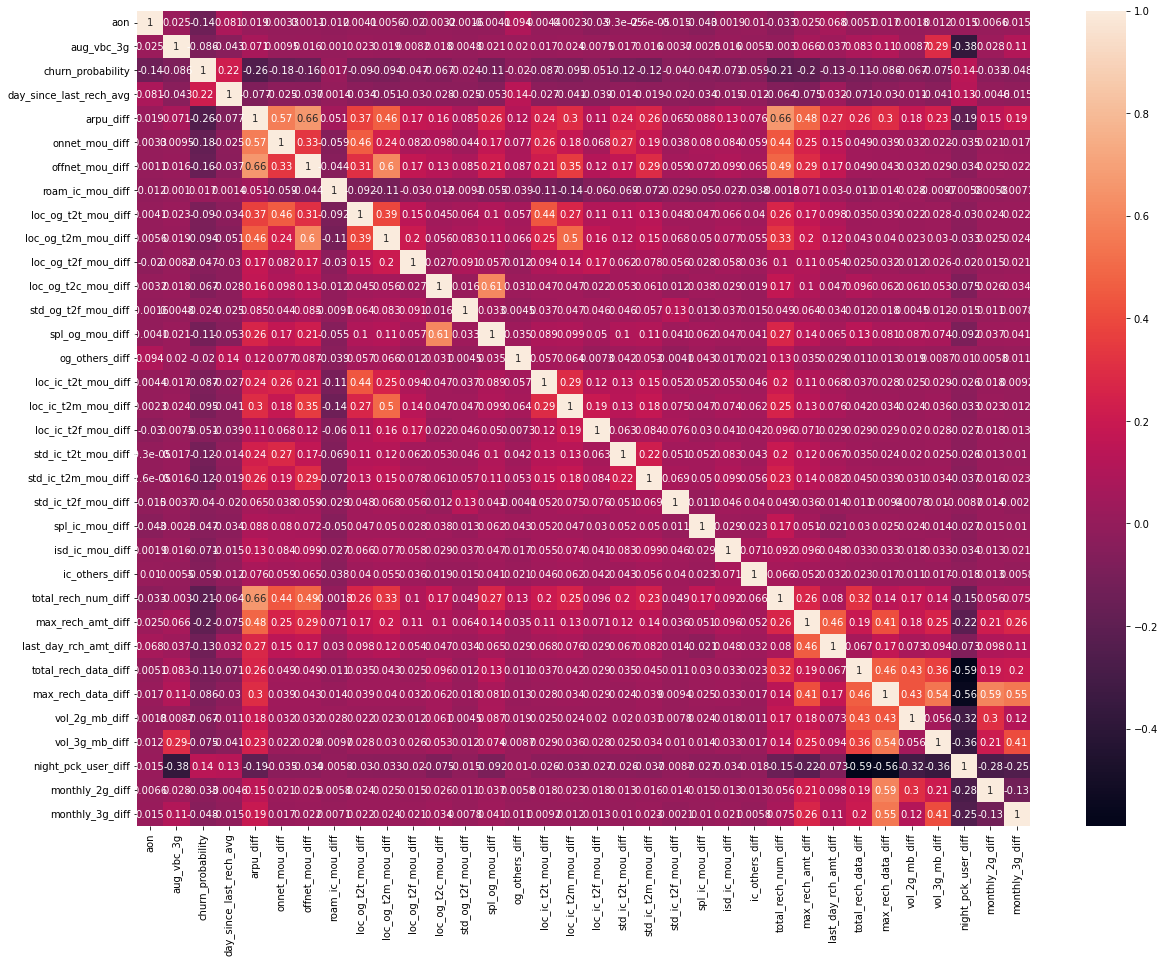

In [66]:
# Correlation between remaining numerical features
plt.figure(figsize = (20, 15))
sns.heatmap(train.corr(), annot = True)
plt.show()

#### Step 3.3: Advanced Data Analysis

In [67]:
# List of columns with their unique values
for val in train.columns:
    print(val, train[val].nunique())

aon 2873
aug_vbc_3g 7172
churn_probability 2
day_since_last_rech_avg 65
arpu_diff 67637
onnet_mou_diff 48876
offnet_mou_diff 57522
roam_ic_mou_diff 8297
loc_og_t2t_mou_diff 36262
loc_og_t2m_mou_diff 48462
loc_og_t2f_mou_diff 11673
loc_og_t2c_mou_diff 4684
std_og_t2f_mou_diff 2184
spl_og_mou_diff 14462
og_others_diff 208
loc_ic_t2t_mou_diff 38364
loc_ic_t2m_mou_diff 51064
loc_ic_t2f_mou_diff 20292
std_ic_t2t_mou_diff 17269
std_ic_t2m_mou_diff 26743
std_ic_t2f_mou_diff 5990
spl_ic_mou_diff 341
isd_ic_mou_diff 7660
ic_others_diff 2197
total_rech_num_diff 78
max_rech_amt_diff 838
last_day_rch_amt_diff 737
total_rech_data_diff 16
max_rech_data_diff 582
vol_2g_mb_diff 16958
vol_3g_mb_diff 12250
night_pck_user_diff 8
monthly_2g_diff 5
monthly_3g_diff 5


#### Categorical Data Analysis

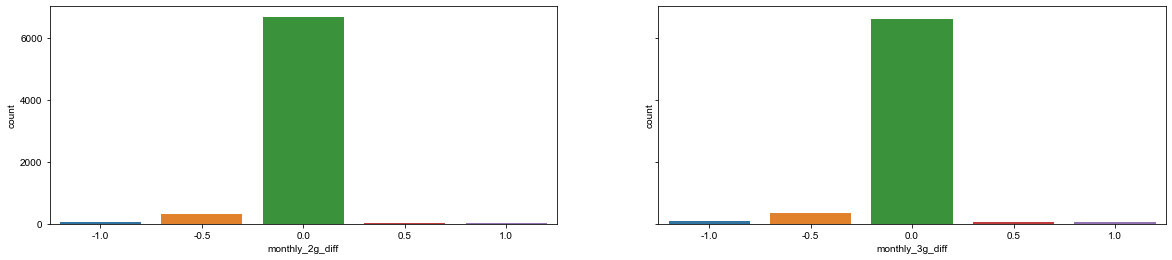

In [68]:
fig, axs = plt.subplots(1, 2, figsize = (20, 4), sharey = True)
sns.countplot(x = train['monthly_2g_diff'][train['churn_probability'] == 1], ax = axs[0])
sns.countplot(x = train['monthly_3g_diff'][train['churn_probability'] == 1], ax = axs[1])
sns.set_theme(font_scale = 1.5)
plt.show()

#### Numerical Data Analysis

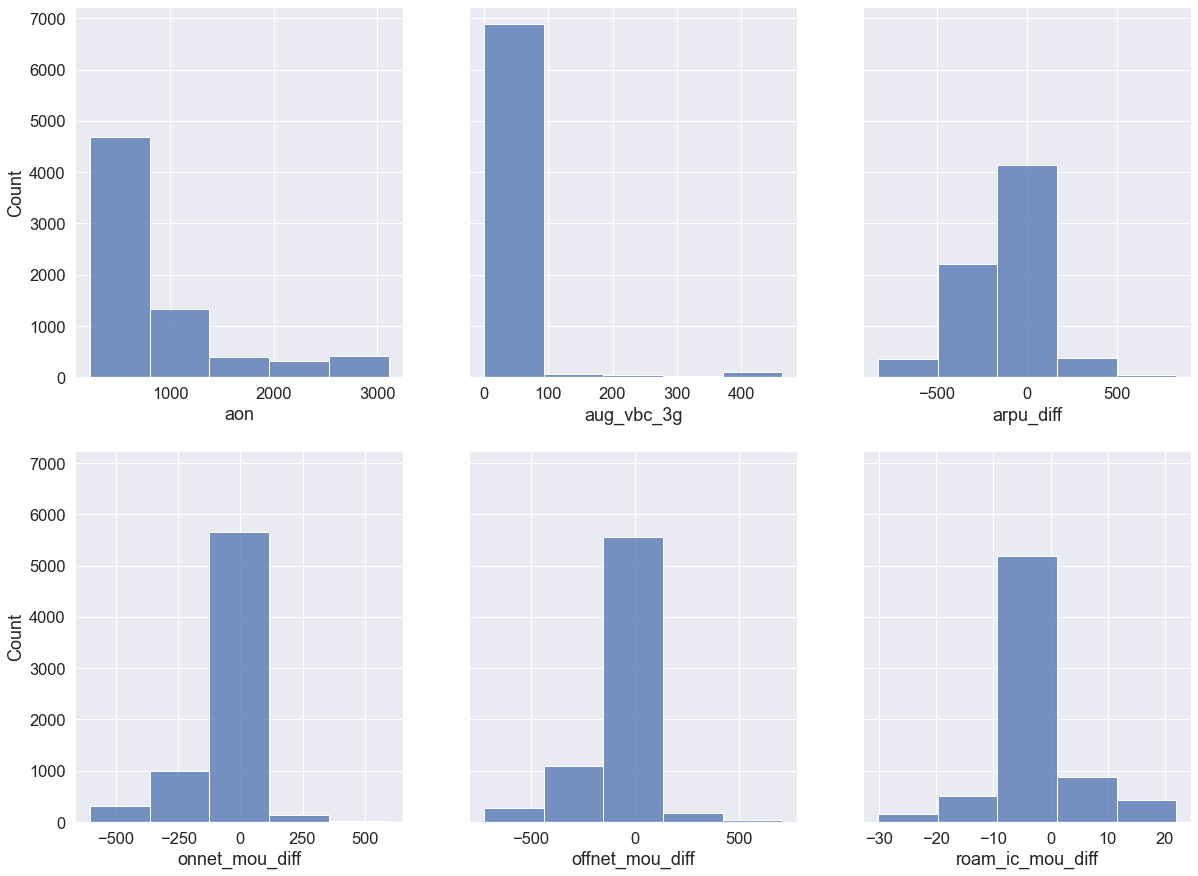

In [69]:
fig, axs = plt.subplots(2, 3, figsize = (20, 15), sharey = True)
sns.histplot(x = 'aon', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[0][0])
sns.histplot(x = 'aug_vbc_3g', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[0][1])
sns.histplot(x = 'arpu_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[0][2])
sns.histplot(x = 'onnet_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[1][0])
sns.histplot(x = 'offnet_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[1][1])
sns.histplot(x = 'roam_ic_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[1][2])
sns.set_theme(font_scale = 1.5)
plt.show()

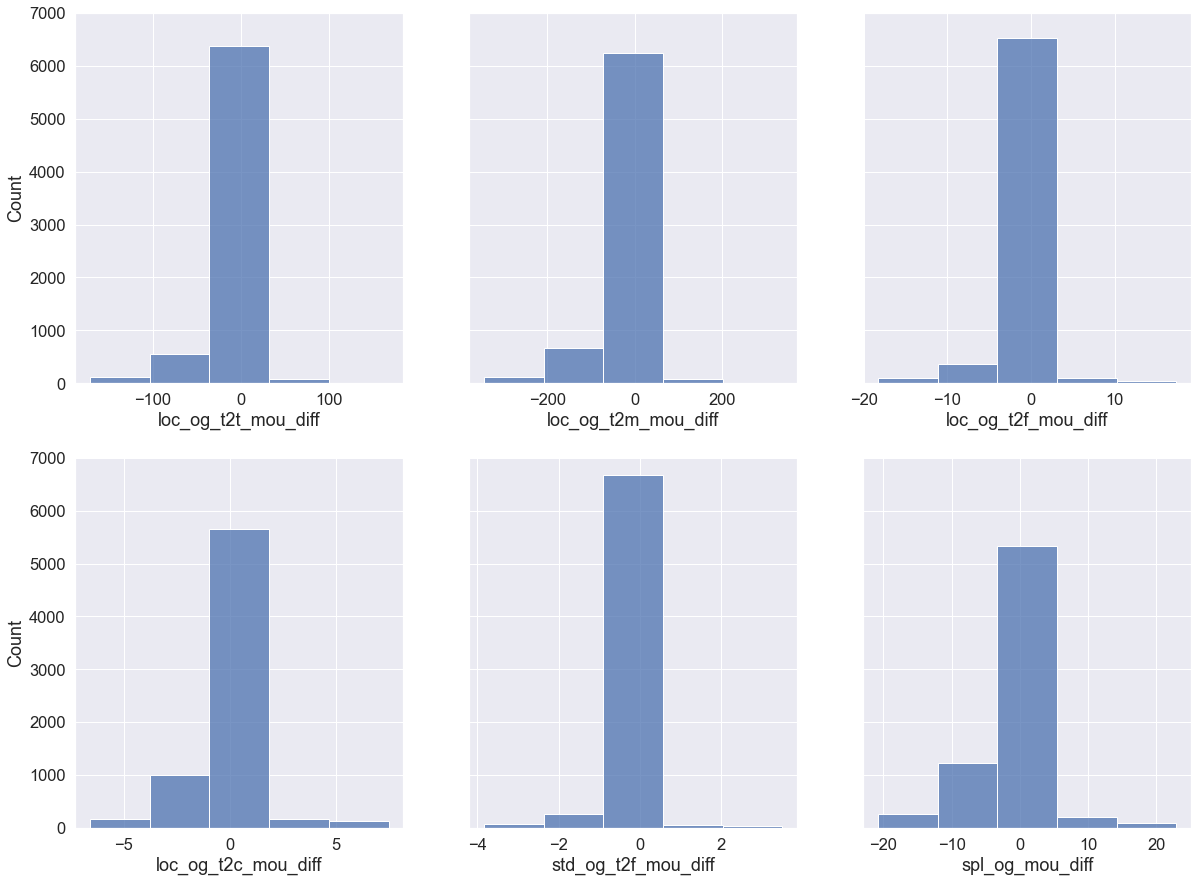

In [70]:
fig, axs = plt.subplots(2, 3, figsize = (20, 15), sharey = True)
sns.histplot(x = 'loc_og_t2t_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[0][0])
sns.histplot(x = 'loc_og_t2m_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[0][1])
sns.histplot(x = 'loc_og_t2f_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[0][2])
sns.histplot(x = 'loc_og_t2c_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[1][0])
sns.histplot(x = 'std_og_t2f_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[1][1])
sns.histplot(x = 'spl_og_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[1][2])
sns.set_theme(font_scale = 1.5)
plt.show()

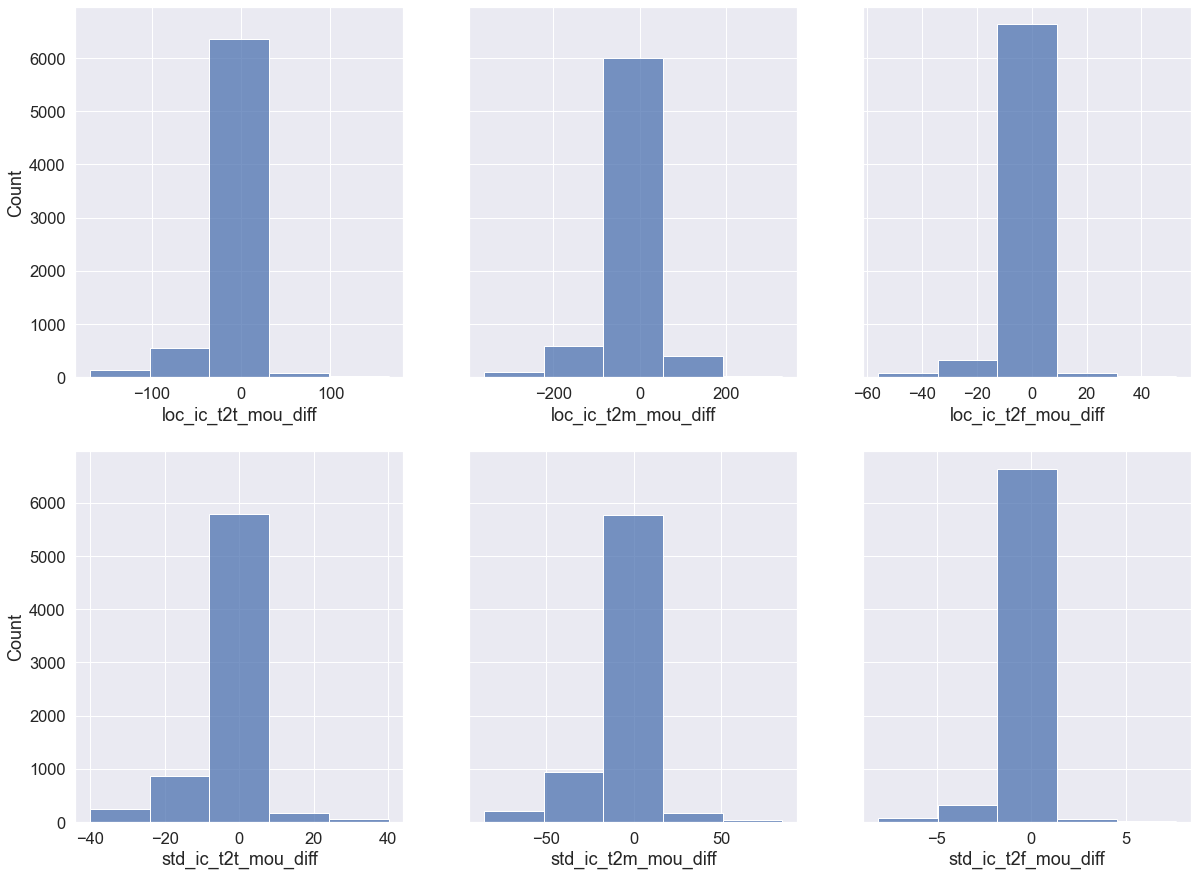

In [71]:
fig, axs = plt.subplots(2, 3, figsize = (20, 15), sharey = True)
sns.histplot(x = 'loc_ic_t2t_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[0][0])
sns.histplot(x = 'loc_ic_t2m_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[0][1])
sns.histplot(x = 'loc_ic_t2f_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[0][2])
sns.histplot(x = 'std_ic_t2t_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[1][0])
sns.histplot(x = 'std_ic_t2m_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[1][1])
sns.histplot(x = 'std_ic_t2f_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[1][2])
sns.set_theme(font_scale = 1.5)
plt.show()

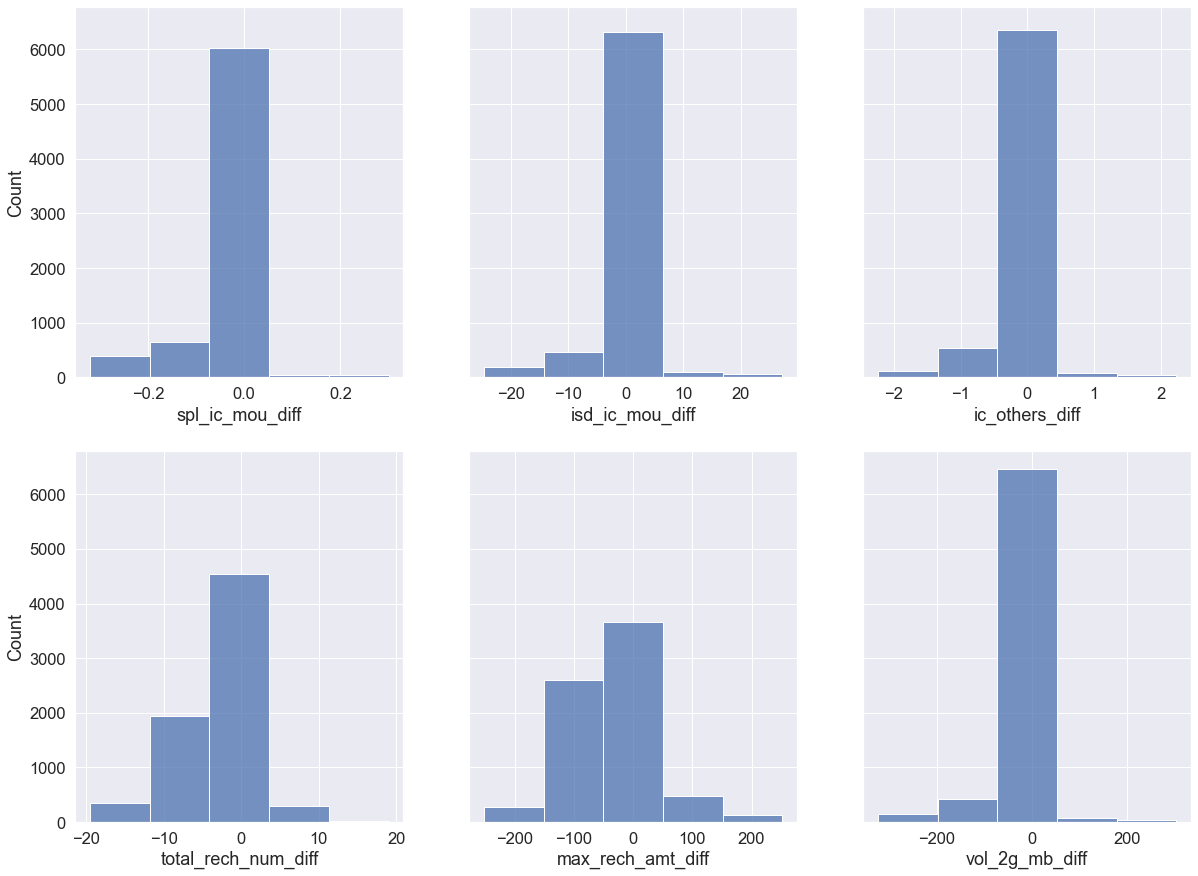

In [72]:
fig, axs = plt.subplots(2, 3, figsize = (20, 15), sharey = True)
sns.histplot(x = 'spl_ic_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[0][0])
sns.histplot(x = 'isd_ic_mou_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[0][1])
sns.histplot(x = 'ic_others_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[0][2])
sns.histplot(x = 'total_rech_num_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[1][0])
sns.histplot(x = 'max_rech_amt_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[1][1])
sns.histplot(x = 'vol_2g_mb_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[1][2])
sns.set_theme(font_scale = 1.5)
plt.show()

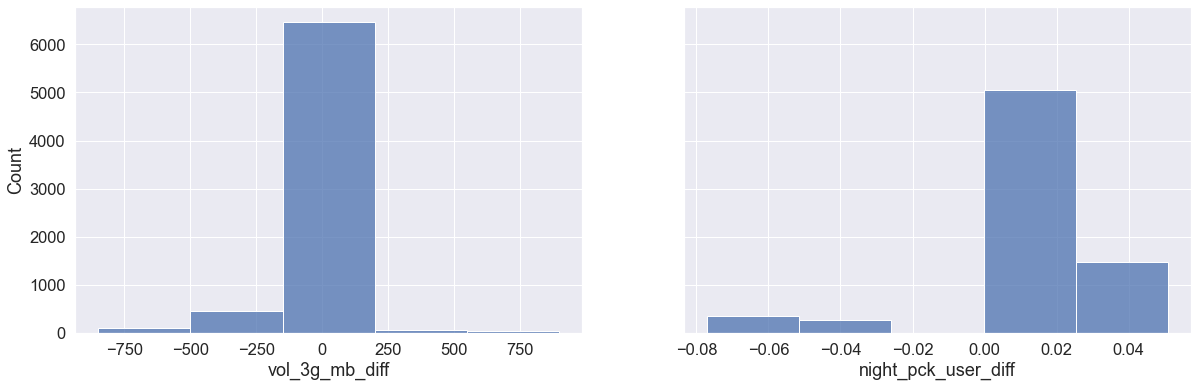

In [73]:
fig, axs = plt.subplots(1, 2, figsize = (20, 6), sharey = True)
sns.histplot(x = 'vol_3g_mb_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[0])
sns.histplot(x = 'night_pck_user_diff', data = train[train['churn_probability'] == 1], bins = 5, ax = axs[1])
sns.set_theme(font_scale = 1.5)
plt.show()

#### Observations Based on Exploratory Data Analysis (EDA)
The probability of churn is the maximum for the following feature values:

**Categorical Feature**

01. `monthly_2g_diff` near `0`.     
02. `monthly_3g_diff` near `0`.    


**Numerical Feature**

01. `aon` in between `0 and 900 units` approximately.
02. `aug_vbc_3g` in between `0 and 100 units` approximately.
03. `arpu_diff` in between `-200 and 200 units` approximately. 
04. `onnet_mou_diff` in between `-125 and 125 units` approximately.
05. `offnet_mou_diff` in between `-100 and 100 units` approximately.
06. `roam_ic_mou_diff` in between `-10and 0 units` approximately. 
07. `loc_og_t2t_mou_diff` in between `-40 and 40 units` approximately.
08. `loc_og_t2m_mou_diff` in between `-80 and 80 units` approximately.
09. `loc_og_t2f_mou_diff` in between `-4 and 4 units` approximately. 
10. `loc_og_t2c_mou_diff` in between `-1 and 2 units` approximately.
11. `std_og_t2f_mou_diff` in between `-1 and 1 units` approximately.
12. `spl_og_mou_diff` in between `-4 and 5 units` approximately. 
13. `loc_ic_t2t_mou_diff` in between `-40 and 40 units` approximately.
14. `loc_ic_t2m_mou_diff` in between `-80 and 80 units` approximately.
15. `loc_ic_t2f_mou_diff` in between `-16 and 16 units` approximately. 
16. `std_ic_t2t_mou_diff` in between `-16 and 16 units` approximately.
17. `std_ic_t2m_mou_diff` in between `-40 and 40 units` approximately.
18. `std_ic_t2f_mou_diff` in between `-2 and 2 units` approximately. 
19. `spl_ic_mou_diff'` in between `-0.1 and 0.1 units` approximately.
20. `isd_ic_mou_diff` in between `-5 and 5 units` approximately.
21. `ic_others_diff` in between `-0.5 and 0.5 units` approximately. 
22. `total_rech_num_diff` in between `-5 and 4 units` approximately.
23. `max_rech_amt_diff` in between `-50 and 50 units` approximately.
24. `vol_2g_mb_diff` in between `-80 and 50 units` approximately. 
25. `vol_3g_mb_diff` in between `-200 and 200 units` approximately.
26. `night_pck_user_diff` in between `0 and 0.025 units` approximately.

#### Since no categorical data is left, dummy encoding for categorical features is not required.

### Step 4: Model Building

In [74]:
# Check the percentage of churn
round((sum(train['churn_probability'])/len(train['churn_probability']))*100, 2)

10.19

#### The churn rate in "train.csv" is 10.19%. So there is a class imbalance.

#### Step 4.1: Train-Test Split

In [75]:
# Putting feature variable to X
X = train.drop(['churn_probability'], axis = 1)

# Putting response variable to y
y = train['churn_probability']

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, stratify = y, random_state = 100)

In [77]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48999, 33)
(48999,)
(21000, 33)
(21000,)


#### Step 4.2: Scale Transformation

In [78]:
# Define rescaling object
scaler = StandardScaler()

In [79]:
# Apply scaling to all the numerical columns
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [80]:
# Check the X_train dataset
X_train.head()

,aon,aug_vbc_3g,day_since_last_rech_avg,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,...,total_rech_num_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,night_pck_user_diff,monthly_2g_diff,monthly_3g_diff
61966,-0.766874,-0.351786,36.000000,0.292546,-0.123033,0.153898,0.124829,0.012888,0.264987,0.035282,...,0.343401,1.106392,-0.024458,-0.062568,-0.019463,0.029215,-0.054945,0.463296,0.002911,-0.021004
27769,-0.315126,-0.351786,32.333333,-0.367610,-0.040399,-2.435260,0.805697,0.110289,-0.029168,0.756185,...,0.824424,-0.965788,-0.705284,-0.062568,-0.019463,0.029215,-0.054945,0.463296,0.002911,-0.021004
14848,-1.066225,-0.351786,38.000000,-0.143148,-0.333025,-0.377552,0.116424,0.147134,-0.226993,0.035282,...,-0.378133,1.075693,-0.402695,-0.062568,-0.019463,0.029215,-0.054945,0.463296,0.002911,-0.021004
24960,2.067711,-0.351786,40.000000,0.734455,0.112611,0.686885,0.124829,0.371667,1.481436,0.666623,...,0.223145,0.338918,-0.932226,-0.062568,-0.019463,0.029215,-0.054945,0.463296,0.002911,-0.021004
27245,-0.653665,-0.351786,34.000000,-1.166771,-0.050139,-0.178169,0.124829,0.384800,-0.194913,-0.399315,...,-0.859156,0.415665,0.429426,-0.062568,-0.019463,0.029215,-0.054945,0.463296,0.002911,-0.021004


In [81]:
# Check the X_test dataset
X_test.head()

,aon,aug_vbc_3g,day_since_last_rech_avg,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,...,total_rech_num_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,night_pck_user_diff,monthly_2g_diff,monthly_3g_diff
59477,-0.208448,-0.351786,33.000000,0.180472,0.414702,0.106229,0.124829,1.535920,0.200381,0.035282,...,-0.257878,0.262171,0.732015,-0.062568,-0.019463,0.029215,-0.054945,0.463296,0.002911,-0.021004
46310,-0.784291,-0.351786,39.333333,-0.823724,0.325774,0.701411,0.047649,0.450463,0.733798,0.035282,...,-0.618645,-1.564418,-0.100105,-1.930031,-2.223402,-0.908581,-2.655946,0.798756,-2.225426,-0.021004
67241,-0.816947,-0.351786,34.333333,-0.497463,0.272057,-0.049576,0.124829,0.343395,0.606191,-0.615145,...,-0.618645,-0.889041,-0.856579,-0.062568,-0.019463,0.029215,-0.054945,0.463296,0.002911,-0.021004
59112,0.346713,-0.351786,32.000000,0.131238,0.105796,-0.290847,-4.372410,0.571212,-0.422502,-0.098327,...,-0.017366,-0.044819,-0.145494,-0.062568,-0.019463,0.029215,-0.054945,0.463296,0.002911,-0.021004
9609,-0.988938,-0.351786,31.666667,1.015116,0.914207,0.515128,-0.985496,-0.093633,0.925385,-0.124755,...,0.343401,0.262171,-0.478342,-0.062568,-0.019463,0.029215,-0.054945,0.463296,0.002911,-0.021004


### Step 4.3.1: Dimensionality Reduction using Principal Component Analysis (PCA)

In [82]:
# Create a PCA object
pca = PCA(random_state = 42)

In [83]:
# Fitting
pca.fit(X_train, y_train)

PCA(random_state=42)

In [84]:
# Calculate cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

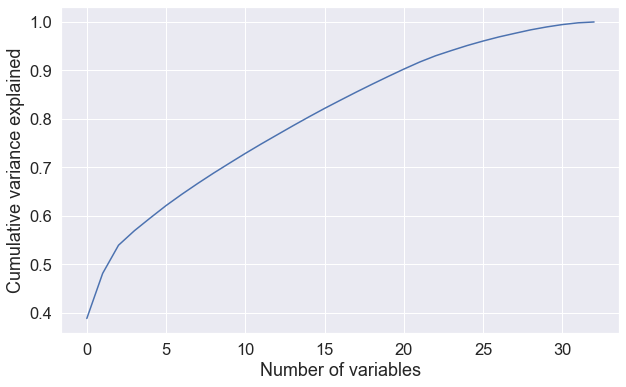

In [85]:
# Cumulative variance plot
fig = plt.figure(figsize = [10, 6])
plt.plot(var_cumu)
plt.xlabel('Number of variables')
plt.ylabel('Cumulative variance explained')
plt.show()

#### 20 variables account for 90% of the variance. 

In [86]:
# Create a PCA object with 20 features
pca_final = IncrementalPCA(n_components = 20)

In [87]:
# Apply reduced PCA on the datasets
train_pca = pca_final.fit_transform(X_train, y_train)
test_pca = pca_final.fit_transform(X_test, y_test)

### Step 4.3.2: Logistic Regression Model with PCA

In [88]:
# Create a logistic regression object
lr = LogisticRegression(class_weight = {0:0.1, 1: 0.9})

In [89]:
# Fitting
lr_pca = lr.fit(train_pca, y_train)

In [90]:
# Prediction
y_train_pred_lr = lr_pca.predict(train_pca)
y_test_pred_lr = lr_pca.predict(test_pca)

In [91]:
# Confusion matrix: train data
print(metrics.confusion_matrix(y_train, y_train_pred_lr))

[[33545 10462]
 [ 1181  3811]]


In [92]:
# Classification report: train data
print(classification_report(y_train, y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     44007
           1       0.27      0.76      0.40      4992

    accuracy                           0.76     48999
   macro avg       0.62      0.76      0.62     48999
weighted avg       0.89      0.76      0.81     48999



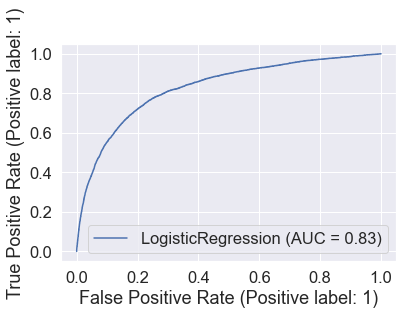

In [93]:
# ROC curve: train data
plot_roc_curve(lr_pca, train_pca, y_train)
plt.show()

In [94]:
# Confusion matrix: test data
print(metrics.confusion_matrix(y_test, y_test_pred_lr))

[[14334  4526]
 [  744  1396]]


In [95]:
# Classification report: test data
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84     18860
           1       0.24      0.65      0.35      2140

    accuracy                           0.75     21000
   macro avg       0.59      0.71      0.60     21000
weighted avg       0.88      0.75      0.79     21000



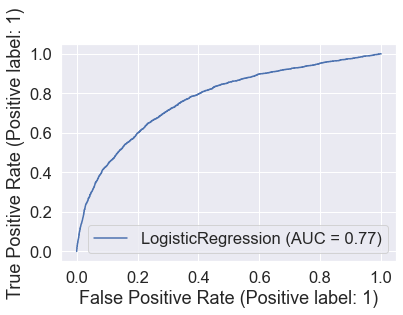

In [96]:
# ROC curve: test data
plot_roc_curve(lr_pca, test_pca, y_test)
plt.show()

### Step 4.3.3: Decision Tree Model with PCA

In [97]:
# Create a decision tree object 
dt = DecisionTreeClassifier(random_state = 42, max_depth = 4)

In [98]:
# Fitting
dt_pca = dt.fit(train_pca, y_train)

In [99]:
# Prediction
y_train_pred_dt = dt_pca.predict(train_pca)
y_test_pred_dt = dt_pca.predict(test_pca)

In [100]:
# Confusion matrix: train data
print(metrics.confusion_matrix(y_train, y_train_pred_dt))

[[43922    85]
 [ 4687   305]]


In [101]:
# Classification report: train data
print(classification_report(y_train, y_train_pred_dt))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     44007
           1       0.78      0.06      0.11      4992

    accuracy                           0.90     48999
   macro avg       0.84      0.53      0.53     48999
weighted avg       0.89      0.90      0.86     48999



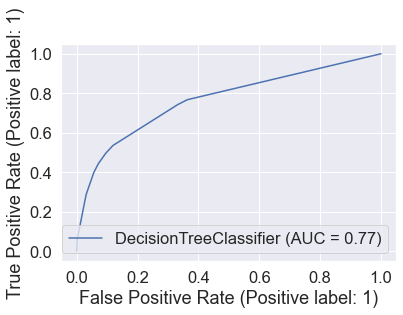

In [102]:
# ROC curve: train data
plot_roc_curve(dt_pca, train_pca, y_train)
plt.show()

In [103]:
# Confusion matrix: test data
print(metrics.confusion_matrix(y_test, y_test_pred_dt))

[[18833    27]
 [ 2056    84]]


In [104]:
# Classification report: test data
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     18860
           1       0.76      0.04      0.07      2140

    accuracy                           0.90     21000
   macro avg       0.83      0.52      0.51     21000
weighted avg       0.89      0.90      0.86     21000



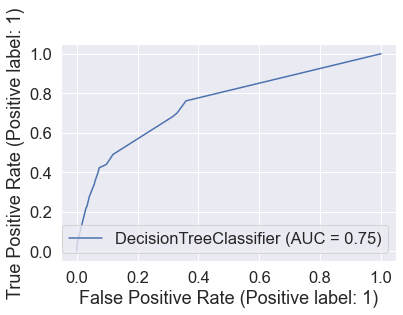

In [105]:
# ROC curve: test data
plot_roc_curve(dt_pca, test_pca, y_test)
plt.show()

#### Hyper-parameter Tuning for the Decision Tree

In [111]:
# # Create a decision tree object 
dt = DecisionTreeClassifier(random_state = 42)

In [112]:
# Define parmeter range
params = {'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100, 500]}

# Create stratified 5-folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# Grid search cross-validation
grid_search = GridSearchCV(estimator = dt, param_grid = params, cv = folds, n_jobs = -1, verbose = 1, scoring = 'accuracy')

In [115]:
# Fitting
dt_pca = grid_search.fit(train_pca, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [116]:
# Grid search best score
grid_search.best_score_

0.904426622041816

In [117]:
# Grid search best model
dt_pca_best = grid_search.best_estimator_
dt_pca_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, random_state=42)

In [118]:
# Prediction
y_train_pred_dt_best = dt_pca_best.predict(train_pca)
y_test_pred_dt_best = dt_pca_best.predict(test_pca)

In [119]:
# Confusion matrix: train data
print(metrics.confusion_matrix(y_train, y_train_pred_dt_best))

[[43296   711]
 [ 3610  1382]]


In [120]:
# Classification report: train data
print(classification_report(y_train, y_train_pred_dt_best))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     44007
           1       0.66      0.28      0.39      4992

    accuracy                           0.91     48999
   macro avg       0.79      0.63      0.67     48999
weighted avg       0.90      0.91      0.90     48999



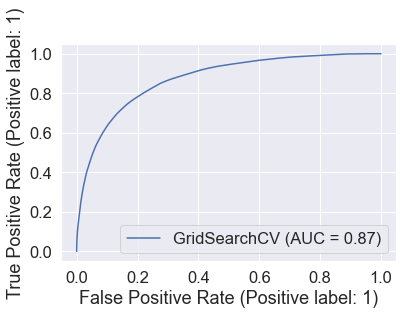

In [121]:
# ROC curve: train data
plot_roc_curve(dt_pca, train_pca, y_train)
plt.show()

In [122]:
# Confusion matrix: test data
print(metrics.confusion_matrix(y_test, y_test_pred_dt_best))

[[18534   326]
 [ 1826   314]]


In [123]:
# Classification report: test data
print(classification_report(y_test, y_test_pred_dt_best))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     18860
           1       0.49      0.15      0.23      2140

    accuracy                           0.90     21000
   macro avg       0.70      0.56      0.59     21000
weighted avg       0.87      0.90      0.87     21000



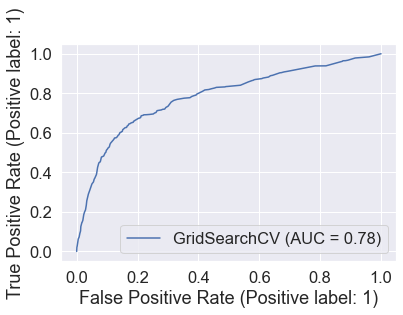

In [124]:
# ROC curve: test data
plot_roc_curve(dt_pca, test_pca, y_test)
plt.show()

### Step 4.3.4: Random Forest Model with PCA

In [125]:
# Create a random forest object
rf = RandomForestClassifier(n_estimators = 10, max_depth = 4, max_features = 5, random_state = 100, oob_score = True)

In [126]:
# Fitting
rf_pca = rf.fit(train_pca, y_train)

In [127]:
# Check OOB score
rf.oob_score_

0.899161207371579

In [128]:
# Prediction
y_train_pred_rf = rf_pca.predict(train_pca)
y_test_pred_rf = rf_pca.predict(test_pca)

In [129]:
# Confusion matrix: train data
print(metrics.confusion_matrix(y_train, y_train_pred_rf))

[[44007     0]
 [ 4992     0]]


In [130]:
# Classification report: train data
print(classification_report(y_train, y_train_pred_rf))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     44007
           1       0.00      0.00      0.00      4992

    accuracy                           0.90     48999
   macro avg       0.45      0.50      0.47     48999
weighted avg       0.81      0.90      0.85     48999



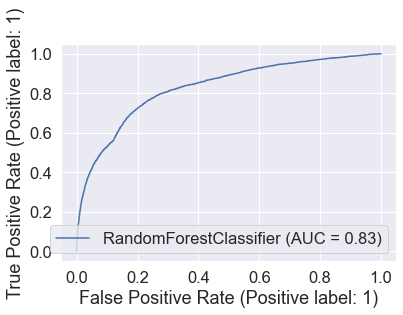

In [131]:
# ROC curve: train data
plot_roc_curve(rf_pca, train_pca, y_train)
plt.show()

In [132]:
# Confusion matrix: test data
print(metrics.confusion_matrix(y_test, y_test_pred_rf))

[[18860     0]
 [ 2140     0]]


In [133]:
# Classification report: test data
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     18860
           1       0.00      0.00      0.00      2140

    accuracy                           0.90     21000
   macro avg       0.45      0.50      0.47     21000
weighted avg       0.81      0.90      0.85     21000



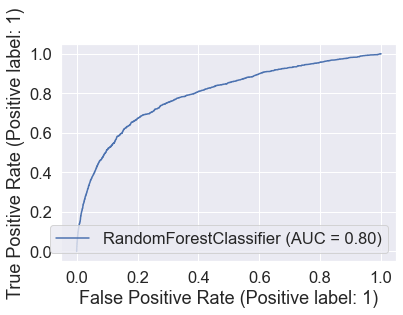

In [134]:
# ROC curve: test data
plot_roc_curve(rf_pca, test_pca, y_test)
plt.show()

#### Hyper-parameter Tuning for the Random Forest

In [135]:
# Create a random forest object
rf = RandomForestClassifier(random_state = 42, n_jobs = -1)

In [136]:
# Define parmeter range
params = {'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100, 200], 'n_estimators': [10, 25, 50, 100]}

# Create stratified 5-folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# Grid search cross-validation
grid_search = GridSearchCV(estimator = rf, param_grid = params, cv = folds, n_jobs = -1, verbose = 1, scoring = 'accuracy')

In [137]:
# Fitting
rf_pca = grid_search.fit(train_pca, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [138]:
# Grid search best score
grid_search.best_score_

0.9123859806602507

In [139]:
# Grid search best model
rf_pca_best = grid_search.best_estimator_
rf_pca_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [140]:
# Prediction
y_train_pred_rf_best = rf_pca_best.predict(train_pca)
y_test_pred_rf_best = rf_pca_best.predict(test_pca)

In [141]:
# Confusion matrix: train data
print(metrics.confusion_matrix(y_train, y_train_pred_rf_best))

[[43974    33]
 [ 2235  2757]]


In [142]:
# Classification report: train data
print(classification_report(y_train, y_train_pred_rf_best))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     44007
           1       0.99      0.55      0.71      4992

    accuracy                           0.95     48999
   macro avg       0.97      0.78      0.84     48999
weighted avg       0.96      0.95      0.95     48999



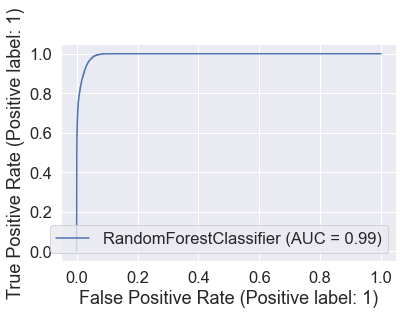

In [143]:
# ROC curve: train data
plot_roc_curve(rf_pca_best, train_pca, y_train)
plt.show()

In [144]:
# Confusion matrix: test data
print(metrics.confusion_matrix(y_test, y_test_pred_rf_best))

[[18828    32]
 [ 2003   137]]


In [145]:
# Classification report: test data
print(classification_report(y_test, y_test_pred_rf_best))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     18860
           1       0.81      0.06      0.12      2140

    accuracy                           0.90     21000
   macro avg       0.86      0.53      0.53     21000
weighted avg       0.89      0.90      0.86     21000



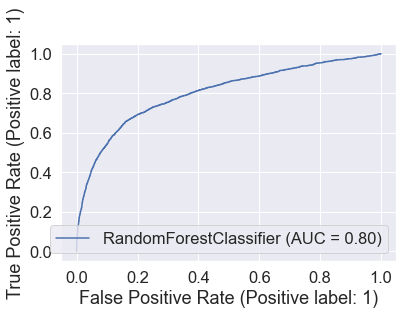

In [146]:
# ROC curve: test data
plot_roc_curve(rf_pca_best, test_pca, y_test)
plt.show()

In [147]:
# Check the feature importances
rf_pca_best.feature_importances_

array([0.14573863, 0.15663444, 0.03698089, 0.04037132, 0.06100676,
       0.03272536, 0.03135299, 0.05324942, 0.04236363, 0.03977393,
       0.03775674, 0.03384787, 0.03009996, 0.03720011, 0.0461286 ,
       0.03285594, 0.03938871, 0.03382839, 0.03506827, 0.03362804])

### Step 5: Final Evolution on the Given Test Data

#### So after performing the above three models, we found that the cross-validated random forest model for the reduced number of features that was done by PCA, performed well on both the training and test parts of the 'train. csv' dataset.

In [148]:
# Best model
rf_pca_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [149]:
# Apply the best model on 'test.csv'
new_test_pca = pca_final.fit_transform(test)
new_test_pred = rf_pca_best.predict(new_test_pca)

In [150]:
# Store the predictions in a dataframe
test_dummy = pd.read_csv('test.csv')
solution = pd.DataFrame({'id': test_dummy['id'], 'churn_probability': new_test_pred})
solution = solution.set_index('id')
solution.head(20)

,churn_probability
id,
69999,1
70000,1
70001,0
70002,0
70003,0
70004,0
70005,0
70006,1
70007,0


In [151]:
# Check the churn statistics for the 'test.csv' dataset
solution['churn_probability'].value_counts()

0    26730
1     3270
Name: churn_probability, dtype: int64

In [152]:
# Save the predictions in a csv file
solution.to_csv('debasish_mondal_solution.csv')